**Data Mining, storage and retrieval: Jupyter Notebook.**


**Supervised (Labeled)**
1. Classification
(Discrete data; Yes/no)
  - Logistic regression
  - Classification and regression techniques (CART)
  - Random forest
  - AdaBoost
  - Decision Trees.
  - XGBoost
  - KNN
  - DEEP LEARNING - CNN
  - Suport Vector Machine classifier
3. Regression
  (Continous)
- Linear regression
- Classification and regression techniques (CART)
- Random Forest
- AdaBoost
- Decision trees
- XG Boost
  
- Support Vector Machine Regressor

**Unsupervised (NO labels)**

- K-Means
- DBSCAN

Reinforcement learning


Q

**Logistic regression.**
- Passes the input through the logistic/sigmoid but then treats the results as a probability.
- S- Curve

In [2]:
import pandas as pd
import pylab as pl
import numpy  as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt

- Customers who left within the last month - column Churn
- Services that each customer has signed up for -  phone, internet
- Customer account information
- Demographic info about customers -
- 

Variables catalogue

Tenure - means 

Now, start with loading the dataset.

In [3]:
churn_df = pd.read_csv("ChurnData.csv") #data frame
churn_df.head() #displays first 5 rows.

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
churn_df.shape

(200, 28)

In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

Data pre-processing
- Filter out the columns that you will use in your analysis.

In [6]:
churn_df = churn_df[['tenure', 'age','address','income','ed','employ','equip','callcard','wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head(11)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,0


In [7]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    int32  
dtypes: float64(9), int32(1)
memory usage: 15.0 KB


- How many rows and columns are there?

In [8]:
churn_df.shape

(200, 10)

- Define X and y for the dataset:
- Target variable and the test set.

In [9]:
X = np.asarray(churn_df[['tenure', 'age','address','income','ed','employ','equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [10]:
y = np.asarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

How does normalizing the data help us?

- Helps reduce bias.
- Prevents features with large ranges from dominating small ones. eg income and age.
- It helps to ansure that all features contribute equally to the model perfomance.


So  let us normalize our data.

In [11]:

# This gives -1 to 1 OR the min-max normalization (o to 1)
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

**Train/ Test dataset**
- We split our dataset into train and test set:

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=50)
print ('Train set', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set (160, 7) (160,)
Test set: (40, 7) (40,)


Modeling

LogisticRegression from Scikit-learn pachage.
- Implements Logistic regression and can use different numerical optimizers to find parameters.
- Inclusing 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga' solvers.

- This logistic regression version supports regularization.

- Regularization is a technique used to solve the overfitting problem of machine learning models.
- C parameter indicates inverse of regularization strength which must be  positive float.
- Smaller values specify stronger regularization.


Now, fitting the model with the train set:

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR =  LogisticRegression (C=0.01, solver='liblinear').fit(X_train,y_train) #training
LR

LogisticRegression(C=0.01, solver='liblinear')

- Full dataset
- Split:


- X_train, y_train
**Training the model**


- X_Test, y_test
**Testing the model**

Randomstate - Controls the shuffling applied to data before applying the split. (just like shuffling cards)

- Regularization makes the model to perform better.

Now we can predict 

In [14]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

- Returns estimates for all classes, ordered by the label of classes. 
- So the first column is te probability of class 0, P(Y=0|X)

In [15]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.60929593, 0.39070407],
       [0.56261203, 0.43738797],
       [0.66581936, 0.33418064],
       [0.60898438, 0.39101562],
       [0.53421542, 0.46578458],
       [0.64590907, 0.35409093],
       [0.65952353, 0.34047647],
       [0.67275894, 0.32724106],
       [0.5560352 , 0.4439648 ],
       [0.43865823, 0.56134177],
       [0.6057878 , 0.3942122 ],
       [0.5535045 , 0.4464955 ],
       [0.73980045, 0.26019955],
       [0.51067938, 0.48932062],
       [0.47374541, 0.52625459],
       [0.59236505, 0.40763495],
       [0.51430836, 0.48569164],
       [0.53656652, 0.46343348],
       [0.50259719, 0.49740281],
       [0.47609689, 0.52390311],
       [0.48369862, 0.51630138],
       [0.54312857, 0.45687143],
       [0.47209848, 0.52790152],
       [0.4883205 , 0.5116795 ],
       [0.52447277, 0.47552723],
       [0.51752996, 0.48247004],
       [0.48029597, 0.51970403],
       [0.55295633, 0.44704367],
       [0.64606443, 0.35393557],
       [0.45275098, 0.54724902],
       [0.

**Evaluation**

- Confusion matrix.
- A way of looking at the accuracy of the classifier.


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test,yhat,labels=[1,0]))

[[11  8]
 [ 2 19]]


Confusion matrix, without normalization
[[11  8]
 [ 2 19]]


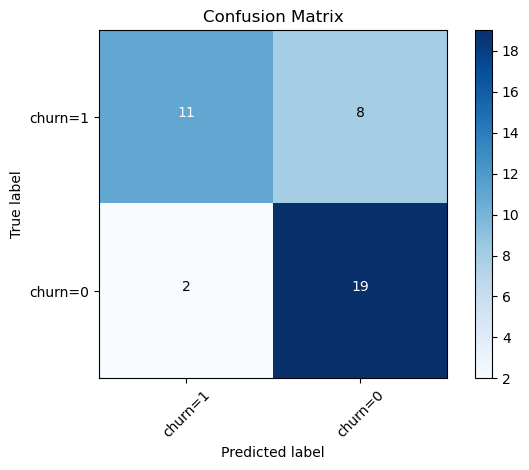

              precision    recall  f1-score   support

           1       0.85      0.58      0.69        19
           0       0.70      0.90      0.79        21

    accuracy                           0.75        40
   macro avg       0.77      0.74      0.74        40
weighted avg       0.77      0.75      0.74        40



In [20]:
import matplotlib.pyplot as plt
import itertools


from sklearn.metrics import confusion_matrix, classification_report
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# --- Usage (assuming y_test and yhat are defined) ---
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1, 0])
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix,
                      classes=['churn=1', 'churn=0'],normalize=False,title='Confusion Matrix')

print(classification_report(y_test, yhat, labels=[1, 0]))


In [21]:
plot_confusion_matrix

<function __main__.plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x000001F3B2468490>)>